In [1]:
import os
import glob
import random
import json
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm,trange
import csv
from PIL import Image
# import torch
# import torchvision
# from torchvision import transforms
import matplotlib.pyplot as plt
from pandas import DataFrame

/home/eslab/anaconda3/envs/nyh/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = './aihub'

if os.path.isdir(path)==False: 
    os.makedirs(path+'/img')
else: print("exist_dir, plz check path_name ")

exist_dir, plz check path_name 


In [3]:
##경로 설정 
train_dir = '/hdd1/label/'# json파일이 있는 경로를 여기다 입력 
img_train_dir = '/hdd1/image2/'

In [4]:
import os
train_dir = "/hdd1/label"
s = 0

li = []
for (path, dir, files) in os.walk(train_dir):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        
        if ext == '.json':
            index_number = filename.split('.')[0]
            li.append(index_number)

li_2 = []
train_dir = "/hdd1/image"
for (path, dir, files) in os.walk(train_dir):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        li_2.append(filename.split('.')[0])
        # if filename.split('.')[0] in li:
        #     pass
        # else:
        #     print(filename)

        # if ext != '.zip':
            # index_number = filename.split('.')[0]
            # li_2.append(index_number)

liset = set(li)
li2set = set(li_2)
set(liset | li2set) - set(liset & li2set)

{'Training_책표지_기술과학_원천데이터',
 'Training_책표지_기타_원천데이터',
 'Training_책표지_문학_원천데이터',
 'Training_책표지_사회과학_원천데이터',
 'Training_책표지_언어_원천데이터',
 'Training_책표지_역사_원천데이터',
 'Training_책표지_예술_원천데이터',
 'Training_책표지_자연과학_원천데이터',
 'Training_책표지_종교_원천데이터',
 'Training_책표지_철학_원천데이터',
 'Training_책표지_총류_원천데이터'}

In [5]:
def number_of_subfiles(train_dir):
    s = 0
    lists = []
    for (path, dir, files) in os.walk(train_dir):
        for filename in files:
            ext = os.path.splitext(filename)[-1]
            # print(path+"/"+filename)
            if ext != '.zip':
                s+=1
                index_number = filename.split('.')[0]
                lists.append(path+"/"+filename)
    return s, lists

cnt_image, list_image = number_of_subfiles("/hdd1/image")
cnt_label, list_label = number_of_subfiles("/hdd1/label")

print(cnt_image, cnt_label)

447401 447401


In [6]:
# 정렬한 데이터의 순서가 맞는지 검증
for i in range(0, 450000, 100000):
    print(sorted(list_image)[i], sorted(list_label)[i])

/hdd1/image/1. 가로형간판/간판_가로형간판_000001.jpg /hdd1/label/1.간판/1.가로형간판/가로형간판1/간판_가로형간판_000001.json
/hdd1/image/1. 가로형간판/간판_가로형간판_100090.jpg /hdd1/label/1.간판/1.가로형간판/가로형간판4/간판_가로형간판_100090.json
/hdd1/image/2. 돌출간판/간판_돌출간판_048969.jpg /hdd1/label/1.간판/2.돌출간판/돌출간판2/간판_돌출간판_048969.json
/hdd1/image/5. 실내안내판/간판_실내안내판_013072.jpg /hdd1/label/1.간판/5.실내안내판/새 폴더 (2)/간판_실내안내판_043070.json
/hdd1/image/8. 현수막/간판_현수막_015933.jpg /hdd1/label/1.간판/8.현수막/간판_현수막_015933.json


In [7]:
list_image = sorted(list_image)
list_label = sorted(list_label)

# crop 예시 

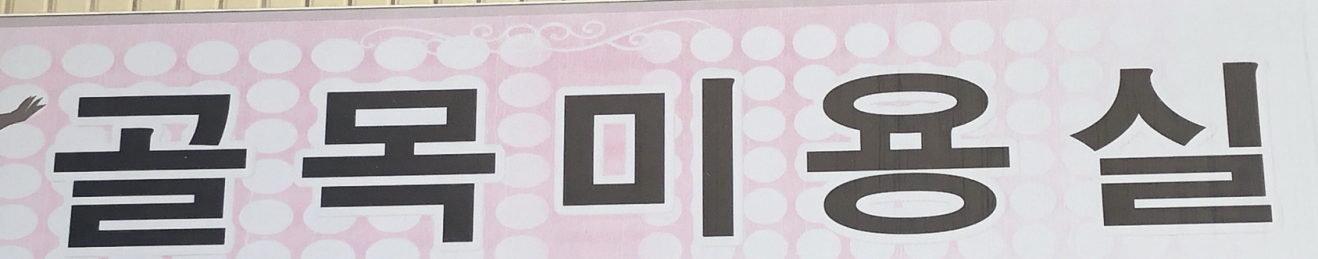

In [8]:
im = Image.open('/hdd1/SW/customocr/open/train/train_00001.png')
im

(100, 170)


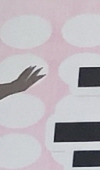

In [9]:
new_img = im.crop((0,30,100,200))
print(new_img.size)
new_img

# json파일 읽음 

In [10]:
train_dir

'/hdd1/image'

In [11]:
json_list = []
for label in tqdm(list_label):    
    with open(label, encoding='utf8') as f:
        json_list.append(json.load(f))

100%|██████████| 447401/447401 [00:38<00:00, 11638.85it/s]


In [12]:
json_list.__len__()

447401

# json 파일로부터 crop할 영역과 label추출

In [14]:
label = []
lotate  = []
idxs = []
# list_image, list_label

# idx -> number, i is info
for idx,i in tqdm(enumerate(json_list),total=len(json_list)):
    for jdx,j in enumerate(i['annotations']):
        if j['bbox'] == [None, None, None, None]: continue
        elif j['text'] == "xxx": continue
        elif j['bbox'][0] > j['bbox'][2] : continue
        idxs.append(idx)
        lotate.append(j['bbox'])
        label.append(j['text'])

100%|██████████| 447401/447401 [00:01<00:00, 242633.76it/s]


In [15]:
len(label), len(lotate)
#전체 len이 같아야 함 

(756234, 756234)

In [16]:
#좌표를 위해서 처리함 Image.crop은 left, top, right, under임 
#그러나 json은 x,y,width, height
for i in trange(len(lotate)):
    lotate[i][2] = lotate[i][0]+lotate[i][2]
    lotate[i][3] = lotate[i][1]+lotate[i][3]

100%|██████████| 756234/756234 [00:01<00:00, 636073.37it/s]


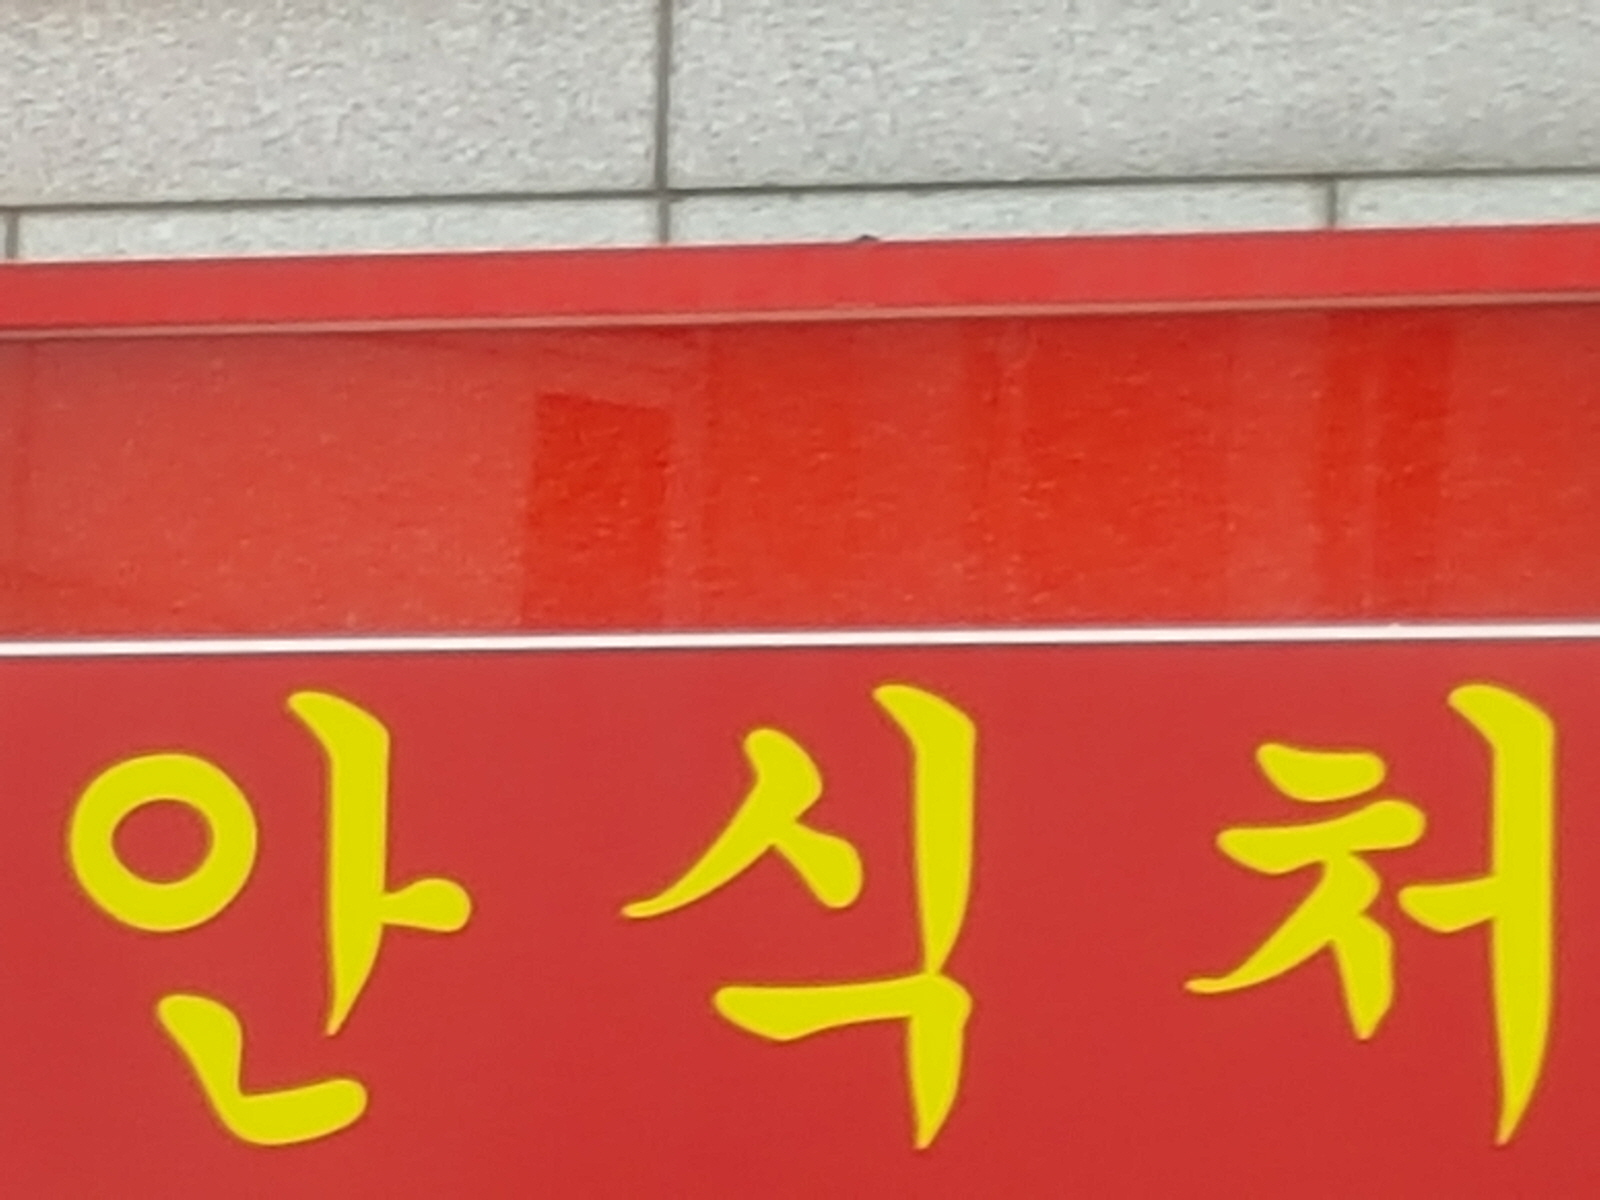

In [17]:
Image.open(list_image[idxs[0]])

In [ ]:
lotate.remove()

In [25]:
new_image = []
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
path = "/hdd1/crop_image"
alpha = 0.5 #resize할 범위 만약 할거면 값 조정해서 resize해서 저장하면 됨 
starts = 400000 + 130510
bins = 200000 - 130510
for idx,i in tqdm(enumerate(lotate[starts:starts+bins]),total =len(lotate[starts:starts+bins])):
    idx+=starts
    # if idx == starts+9 or idx == starts+38: continue
    image = Image.open(list_image[idxs[idx]])
    crop_image = image.crop(i)
    
    # crop_image.resize((crop_image.size[0]*alpha,crop_image.size[1]*alpha))#resize하고 싶은 비율 설정 
    crop_image.save(f'{path}/train_data_{idx}.jpg')

 11%|█         | 7507/69490 [03:09<31:12, 33.10it/s]  

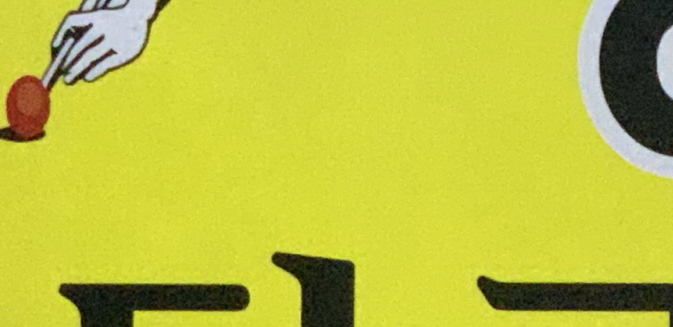

In [55]:
crop_image

# label csv 생성 

In [63]:
path

'./aihub'

In [77]:
data = DataFrame(label)
data.to_csv(path+'/label.csv',sep=',',encoding='utf8',index=False)

In [68]:
####
###csv를 사용해서 만들때 
# with open(path+'/label.csv','w',encoding='utf8') as f:
#     write = csv.writer(f,delimiter='\n')
#     next(write)
#     write.writerows(label)

TypeError: '_csv.writer' object is not an iterator